<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/M08-deep-learning/AT%26T_logo_2016.svg" alt="AT&T LOGO" width="50%" />

# Orange SPAM detector

## Company's Description 📇

AT&T Inc. is an American multinational telecommunications holding company headquartered at Whitacre Tower in Downtown Dallas, Texas. It is the world's largest telecommunications company by revenue and the third largest provider of mobile telephone services in the U.S. As of 2022, AT&T was ranked 13th on the Fortune 500 rankings of the largest United States corporations, with revenues of $168.8 billion! 😮

## Project 🚧

One of the main pain point that AT&T users are facing is constant exposure to SPAM messages.

AT&T has been able to manually flag spam messages for a time, but they are looking for an automated way of detecting spams to protect their users.

## Goals 🎯

Your goal is to build a spam detector, that can automatically flag spams as they come based solely on the sms' content.

## Scope of this project 🖼️

To start off, AT&T would like you to use the following dataset:

[Dowload the Dataset](https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Deep+Learning/project/spam.csv)

## Helpers 🦮

To help you achieve this project, here are a few tips that should help you:

### Start simple
A good deep learing model does not necessarily have to be super complicated!

### Transfer learning
You do not have access to a whole lot of data, perhaps channeling the power of a more sophisticated model trained on billions of observations might help!

## Deliverable 📬

To complete this project, your team should:

* Write a notebook that runs preprocessing and trains one or more deep learning models in order to predict the spam or ham nature of the sms
* State the achieved performance clearly

# 1. EDA

We will begin with importing our dataset and exploring it

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Importing pandas and  numpy to manipulate dataframe and arrays objects
import pandas as pd
import numpy as np

# Importing visualization libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objects as go
color_chart = ["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]

In [ ]:
# Installing and importing wordcloud package
from wordcloud import WordCloud
# !pip uninstall Pillow
# !pip install Pillow==9.4.0

# Importing text preprocessing libraries
import string
!python -m spacy download en_core_web_sm -q
import en_core_web_sm
from spacy.lang.en.stop_words import STOP_WORDS

2023-11-20 00:53:04.740065: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-20 00:53:04.740161: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-20 00:53:04.740213: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-20 00:53:06.262466: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 71.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
# Importing sklearn train-test-split
from sklearn.model_selection import train_test_split

In [ ]:
# Importing tensorflow and keras classes to build neural networks
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

2.14.0


In [ ]:
df = pd.read_csv("https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Deep+Learning/project/spam.csv", encoding = "ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


We have a dataframe with :


*   5572 entries / rows

*   5 columns
*   The first 2 columns seems to represent respectively our label (v1 : ham or spam), and the content of the e-mail (v2)


*   The last 3 columns however, seem to contain mostly null values and will probably not be of much use for our model : we will check their content and possibly drop them




In [ ]:
df["Unnamed: 2"].value_counts()

 bt not his girlfrnd... G o o d n i g h t . . .@"                                                                                                   3
 PO Box 5249                                                                                                                                        2
this wont even start........ Datz confidence.."                                                                                                     2
GN                                                                                                                                                  2
 don't miss ur best life for anything... Gud nyt..."                                                                                                2
 but dont try to prove it..\" .Gud noon...."                                                                                                        2
 Gud night...."                                                                                     

In [ ]:
df["Unnamed: 3"].value_counts()

 MK17 92H. 450Ppw 16"                         2
GE                                            2
 why to miss them                             1
U NO THECD ISV.IMPORTANT TOME 4 2MORO\""      1
i wil tolerat.bcs ur my someone..... But      1
 ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\""    1
whoever is the KING\"!... Gud nyt"            1
 TX 4 FONIN HON                               1
 \"OH No! COMPETITION\". Who knew             1
IåÕL CALL U\""                                1
Name: Unnamed: 3, dtype: int64

In [ ]:
df["Unnamed: 4"].value_counts()

GNT:-)"                                                     2
 just Keep-in-touch\" gdeve.."                              1
 Never comfort me with a lie\" gud ni8 and sweet dreams"    1
 CALL 2MWEN IM BK FRMCLOUD 9! J X\""                        1
 one day these two will become FREINDS FOREVER!"            1
Name: Unnamed: 4, dtype: int64

These columns' non null values are strings that are mostly unique. Since there are so many missing values, these are not informations that are relevant to use when building our model.

We'll also check for duplicates in our dataset and remove them.

In [ ]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.duplicated().sum()

403

In [ ]:
# We have 403 duplicate rows
df = df.drop_duplicates()

We'll rename our columns for a better general understanding, and encode our label into a binary target

In [ ]:
df = df.rename(columns = {"v1" : "label", "v2" : "content"})
df.head()

,label,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df["target"] = df["label"].apply(lambda x : 0 if x == "ham" else 1)
df.head()

,label,content,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
df["label"].value_counts().to_list() == df["target"].value_counts().to_list()

True

We need to observe the distribution of our data : if we have a very imbalanced proportion of each category, this might affect the performances of our model.

In [ ]:
df.label.value_counts(normalize = True)

ham     0.87367
spam    0.12633
Name: label, dtype: float64

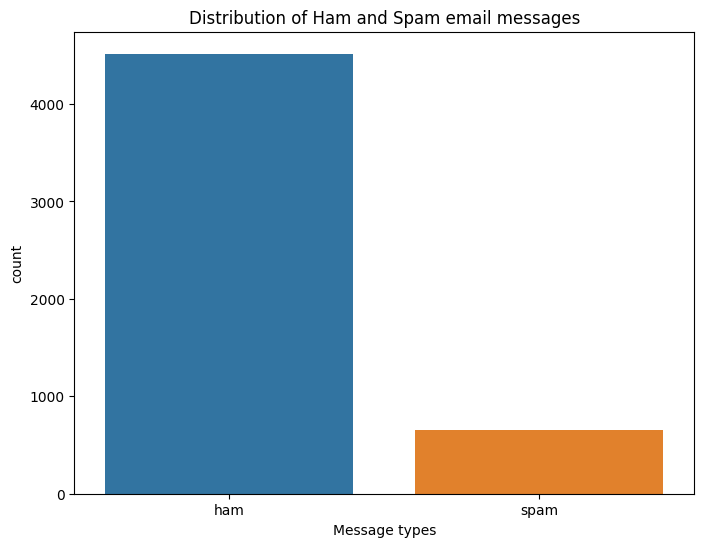

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data = df, x = 'label')
plt.title('Distribution of Ham and Spam email messages')
plt.xlabel('Message types')
plt.show()

This shows how imbalanced our data is : we have a lot less spam than legit mail in the dataset.

This means 2 things for us :    


*   First, it will be absolutely necessary to stratify our train-test-split
*   Second, if our model has an accuracy of approximately 0.88, this might not mean that it performs well but rather that is always predicts a mail as ham, and therefore never detects spam!

If our model performance in the end is not great, we might need to resample our dataset to have balanced proportions of each target.



One useful visualization for NLP is wordclouds : let's produce wordclouds for both our targets and see if something stands out.

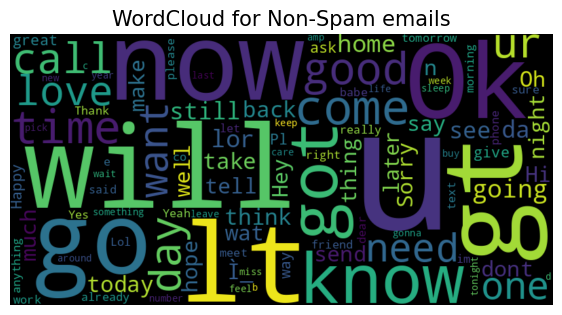

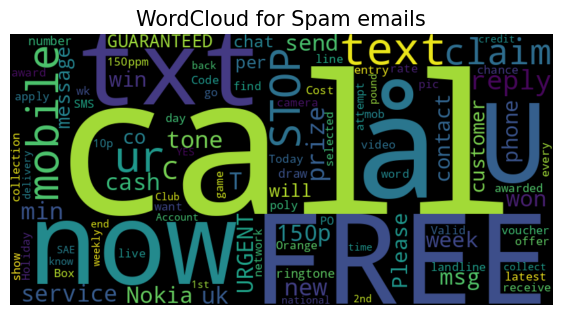

In [ ]:
def plot_word_cloud(data, label):
    email_corpus = " ".join(data['content'])

    plt.figure(figsize=(7, 7))

    wc = WordCloud(background_color='black',
                   max_words=100,
                   width=800,
                   height=400,
                   collocations = False).generate(email_corpus)

    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {label} emails', fontsize=15)
    plt.axis('off')
    plt.show()

plot_word_cloud(df[df["label"] == "ham"], 'Non-Spam')
plot_word_cloud(df[df["label"] == "spam"], 'Spam')

That's a pretty interesting (and expected) result : spam mails tend to contain high frequencies of words such as "free", "claim, "prize", "win", "call", "urgent", that are typical clickbaits.

# 2. Text preprocessing

Before training a Deep Learning model on our data, we need to transform our raw text into a clean and tokenized format.

We will :
- remove all punctuation or special characters and keep only alphanumerical characters, single whitespaces and apostrophes
- put everything in lower case and remove excess whitespaces at the beginning or end of each text
- remove stop words
- replace each word with its lemmatized token

In [ ]:
nlp = en_core_web_sm.load()

In [ ]:
df["clean_content"] = df["content"].apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch == " " or ch == "'"))
df["clean_content"] = df["clean_content"].apply(lambda x : x.replace(" +", " ").lower().strip())
df["clean_content"] = df["clean_content"].apply(lambda x : " ".join([token.lemma_ for token in nlp(x) if (token.text not in STOP_WORDS) & (token.lemma_ not in STOP_WORDS)]))
df

,label,content,target,clean_content
0,ham,"Go until jurong point, crazy.. Available only ...",0,jurong point crazy available bugis n great wor...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,0,u dun early hor u c
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah think usf live
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,2nd time try 2 contact u u win å750 pound priz...
5568,ham,Will Ì_ b going to esplanade fr home?,0,ì b esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",0,pity mood soany suggestion
5570,ham,The guy did some bitching but I acted like i'd...,0,guy bitching act like interested buy week free


In [ ]:
# Checking all of our "clean_content" column is indeed in string format
df["clean_content"].apply(lambda x : type(x) == str).value_counts()

True    5169
Name: clean_content, dtype: int64

We now have completed the preprocessing of each message's content.

Sometimes the preprocessing removes all the words in a string (because they contain only stopwords for example) so we'll filter out those observations.

In [ ]:
df["len_review"] = df["clean_content"].apply(lambda x: len(x))
df = df[df["len_review"]!=0]
df = df.drop("len_review", axis = 1)
df.shape

(5151, 4)

# 3. Train test split, tokenizing and building tensorflow datasets

We'll split our data into train set (60%), validation set (20%), and test set (20%). And since our data is imbalanced, we'll stratify to preserve the proportions of each class of our target.

In [ ]:
X_train, X_rest, Y_train, Y_rest = train_test_split(df["clean_content"], df["target"], test_size = 0.4, stratify = df["target"], random_state = 42) #train set is 60%
X_val, X_test, Y_val, Y_test = train_test_split(X_rest, Y_rest, test_size=0.5, stratify = Y_rest, random_state = 42) #splitting the remaining 40% in half to get 20% in val set and 20% in test set
# random_state ensures reproductibility
print("X_train", X_train.shape, "Y_train", Y_train.shape)
print("X_val", X_val.shape, "Y_val", Y_val.shape)
print("X_test", X_test.shape, "Y_test", Y_test.shape)

X_train (3090,) Y_train (3090,)
X_val (1030,) Y_val (1030,)
X_test (1031,) Y_test (1031,)


We will now instanciate a tokenizer and encode our texts : we will fit on the train set, and then transform all texts.

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000, oov_token = "out_of_vocab") # For now we'll only keep the 1000 most common words, we might change this later and see how it affects performance

In [ ]:
tokenizer.fit_on_texts(X_train)

X_train_encoded = tokenizer.texts_to_sequences(X_train)
X_val_encoded = tokenizer.texts_to_sequences(X_val)
X_test_encoded = tokenizer.texts_to_sequences(X_test)

In order to build an tensorflow dataset that can be used to train our deep learning model, we need to convert our encoded texts to numpy arrays of a unique size. To attain this, we'll use padding.

In [ ]:
train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train_encoded, padding="post")
val_padded = tf.keras.preprocessing.sequence.pad_sequences(X_val_encoded, padding="post")
test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test_encoded, padding="post")

We are now able to build three tensor slice datasets using the training, validation and test data.

In [ ]:
train = tf.data.Dataset.from_tensor_slices((train_padded, Y_train))
val = tf.data.Dataset.from_tensor_slices((val_padded, Y_val))
test = tf.data.Dataset.from_tensor_slices((test_padded, Y_test))

Now we can shuffle our datasets and arrange them in batches.

In [ ]:
train_batch = train.shuffle(len(X_train)).batch(64)
val_batch = val.shuffle(len(X_val)).batch(64)
test_batch = test.shuffle(len(X_test)).batch(64)

# Let's check out what these batches look like
print("train batch:", next(iter(train_batch)))
print("val batch:", next(iter(val_batch)))
print("test batch:", next(iter(test_batch)))

train batch: (<tf.Tensor: shape=(64, 74), dtype=int32, numpy=
array([[916,   1,   0, ...,   0,   0,   0],
       [  1,   1,   0, ...,   0,   0,   0],
       [213, 224, 158, ...,   0,   0,   0],
       ...,
       [519,   1,   1, ...,   0,   0,   0],
       [547,   8,   1, ...,   0,   0,   0],
       [ 37,  63,  15, ...,   0,   0,   0]], dtype=int32)>, <tf.Tensor: shape=(64,), dtype=int64, numpy=
array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])>)
val batch: (<tf.Tensor: shape=(64, 57), dtype=int32, numpy=
array([[  5,  23,  12, ...,   0,   0,   0],
       [ 93, 607, 598, ...,   0,   0,   0],
       [286,  15,  69, ...,   0,   0,   0],
       ...,
       [203, 854,   6, ...,   0,   0,   0],
       [420,   1,   1, ...,   0,   0,   0],
       [ 75,   9, 331, ...,   0,   0,   0]], dtype=int32)>, <tf.Tensor: shape=(64,), dtype=in

We are now ready to implement and train our first deep learning model!

# 4. First neural network

## Building our model

We'll build our first neural network to be as simple as possible. It will be a sequential model including :    


*   an Embedding layer to convert our texts into vectors

*   a Pooling layer to compress the information (after the embedding layer, each text is transformed into as many vectors as there are words) into an embedded sequence
*   A Dense layer


*   The prediction layer : since we're faced with a binary classification problem, this layer will have 1 neuron and a sigmoid activation function



In [ ]:
embedding_dim = 8
vocab_size = tokenizer.num_words + 1 # the number of words in the vocabulary : the input dim needs to be equal to the size of the vocabulary + 1 (because of the zero padding)

model = Sequential([
  Embedding(
      input_dim = vocab_size,
      output_dim = embedding_dim,
      name = "embedding"), # the embedding layer
  GlobalAveragePooling1D(), # this will pick the average for every word in the sentence along each dimension of the representation space.
  Dense(16, activation='relu'), # a dense layer
  Dense(1, activation="sigmoid") # the prediction layer
])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 8)           8008      
                                                                 
 global_average_pooling1d_1  (None, 8)                 0         
 0 (GlobalAveragePooling1D)                                      
                                                                 
 dense_20 (Dense)            (None, 16)                144       
                                                                 
 dense_21 (Dense)            (None, 1)                 17        
                                                                 
Total params: 8169 (31.91 KB)
Trainable params: 8169 (31.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), # from_logits = True to interpret y_pred as a tensor of logit values and not a probability
              metrics = ['accuracy'],
              optimizer = 'adam')

## Training our model

Before fitting, we'll setup callbacks :

Callbacks are used to check whether the model is improving with each epoch or not.

If model performance is not improving then training will be stopped by EarlyStopping.

ReduceLROnPlateau reduces learning rate when a metric has stopped improving
(models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates). This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

In [ ]:
es = EarlyStopping(patience=20,
                   monitor = 'val_accuracy',
                   restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 20,
                       monitor = 'val_loss',
                       factor = 0.5)

Let's train our model !

In [ ]:
history = model.fit(train_batch,
                    epochs = 50,
                    callbacks = [lr, es],
                    validation_data = val_batch
                   )

Epoch 1/50
49/49 [==============================] - 1s 11ms/step - loss: 0.6524 - accuracy: 0.8731 - val_loss: 0.6137 - val_accuracy: 0.8738 - lr: 0.0010
Epoch 2/50
49/49 [==============================] - 0s 7ms/step - loss: 0.5703 - accuracy: 0.8731 - val_loss: 0.5201 - val_accuracy: 0.8738 - lr: 0.0010
Epoch 3/50
49/49 [==============================] - 0s 6ms/step - loss: 0.4724 - accuracy: 0.8731 - val_loss: 0.4207 - val_accuracy: 0.8738 - lr: 0.0010
Epoch 4/50
49/49 [==============================] - 0s 6ms/step - loss: 0.3917 - accuracy: 0.8731 - val_loss: 0.3601 - val_accuracy: 0.8738 - lr: 0.0010
Epoch 5/50
49/49 [==============================] - 0s 4ms/step - loss: 0.3560 - accuracy: 0.8731 - val_loss: 0.3379 - val_accuracy: 0.8738 - lr: 0.0010
Epoch 6/50
49/49 [==============================] - 0s 5ms/step - loss: 0.3441 - accuracy: 0.8731 - val_loss: 0.3256 - val_accuracy: 0.8738 - lr: 0.0010
Epoch 7/50
49/49 [==============================] - 0s 4ms/step - loss: 0.3361 - 

## Model evaluation

It seems our model is performing quite well :    


*   Our training loss consistently decreases
*   So does our val_loss so there doesn't seem to be overfitting


*   Our training accuracy is initially static but starts increasing after 13 epochs and reaches a very good score of over 99%!
*   More importantly, our validation accuracy behaves in the same way and reaches a value close to 99% so it seems our model is good at generalizing





In [ ]:
fig = go.Figure(data=[
                      go.Scatter(
                          y = model.history.history["loss"],
                          name="Training loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[0]
                          )),
                      go.Scatter(
                          y = model.history.history["val_loss"],
                          name="Validation loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[1]
                          ))
])
fig.update_layout(
    title='Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='Binary Cross Entropy'
)
fig.show()

In [ ]:
fig = go.Figure(data=[
                      go.Scatter(
                          y=model.history.history["accuracy"],
                          name="Training accuracy",
                          mode="lines",
                          marker=dict(
                              color=color_chart[0]
                          )),
                      go.Scatter(
                          y=model.history.history["val_accuracy"],
                          name="Validation accuracy",
                          mode="lines",
                          marker=dict(
                              color=color_chart[1]
                          ))
])
fig.update_layout(
    title='Training and val accuracy across epochs',
    xaxis_title='epochs',
    yaxis_title='Accuracy'
)
fig.show()

How does our model behave on unseen data?

In [ ]:
pred = (model.predict(test_batch) > 0.5).astype("int32")
pred.shape

test_loss, test_accuracy = model.evaluate(test_batch)
print('Test Loss :',test_loss)
print('Test Accuracy :',test_accuracy)

17/17 [==============================] - 0s 2ms/step - loss: 0.0669 - accuracy: 0.9816
Test Loss : 0.06693486869335175
Test Accuracy : 0.9815713167190552


The accuracy on the test set is very good as well!

### NB : How to explain that both losses consistently decrease while accuracies do not improve during the 12 first epochs?

Loss and accuracy measure different aspects of a model's performance. While loss measures the difference between the predicted and actual output, accuracy measures the number of correct predictions. It is possible for a model to make the same number of correct predictions even as the predicted output gets closer to the actual output.

### Causes of the Problem

One common cause is overfitting but it is not the case here.

The most obvious cause here is **class imbalance** (when one class has a significantly larger number of samples than the other class). This can lead to a biased model that performs well on the majority class but poorly on the minority class, resulting in stable accuracy.

Other causes include **choice of evaluation metric** : Accuracy is not always the best metric to evaluate a model's performance, especially when dealing with imbalanced classes or multi-class problems. In these cases, it may be more appropriate to use metrics such as precision, recall, or F1-score.

### Solutions

In cases of class imbalance, one solution is to use techniques such as oversampling or undersampling to balance the classes. Oversampling involves creating new samples from the minority class, while undersampling involves removing samples from the majority class. These techniques can help the model learn the patterns in the minority class and improve its performance on unseen data.

Choosing the right evaluation metric can also help overcome the problem of decreasing loss but stable accuracy.

# 5. Other evaluation metrics

The accuracy is calculated as the number of exact predictions performed by your model divided by the total number of predictions, in other words the accuracy is the proportion of exact predictions produced by our model.

$$Accuracy = \frac{TN+TP}{TN+TP+FN+FP}$$

Since the percentage of spam in our dataset is low, measuring our model's performance by accuracy alone is not recommended.


Let's check out other metrics to evaluate our model :


*   Precision : fraction of relevant events from all the retrieved events; the ability of our model to discriminate between classes

$$Precision = \frac{TP}{TP+FP}$$

*   Recall (or True Postive Rate) : fraction of retrieved events from all the relevant events; the ability of the model to detect positives events among all the real positives events in our dataset

$$Recall = \frac{TP}{TP+FN}$$

*   F1 Score : a very useful metric because contrary to the accuracy it takes into account the potential imbalance between the different classes in the dataset for the target variable. The F1 score metric is equal to the harmonic mean between the recall and the precision for a given class of the target variable.

$$
F1 = \frac{Precision + Recall}{Precision \times Recall}
$$



In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

test_pred = [1 if o>0.5 else 0 for o in model.predict(test_padded)]
cf_matrix = confusion_matrix(Y_test, test_pred)

33/33 [==============================] - 0s 2ms/step


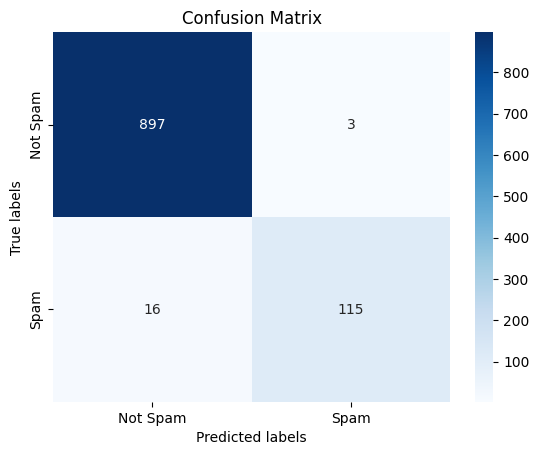

In [ ]:
ax = plt.subplot()
sns.heatmap(cf_matrix, annot = True, ax = ax, cmap = 'Blues',fmt = '');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);

In [ ]:
# tn, fp, fn, tp = cf_matrix.ravel()
print("Precision: {:.2f}%".format(100 * precision_score(Y_test, test_pred)))
print("Recall: {:.2f}%".format(100 * recall_score(Y_test, test_pred)))
print("F1 Score: {:.2f}%".format(100 * f1_score(Y_test, test_pred)))

Precision: 97.46%
Recall: 87.79%
F1 Score: 92.37%


Our model's F1 score is slightly lower than our accuracy in this case, and looking at our other metrics, the lower score is recall, namely the ability to correctly identify spam among all messages.

# 6. Rebalancing dataset classes

Since we have already noted that the low proportion of spam in the dataset can affect our model's performances, perhaps training on a rebalanced dataset will improve them. However, we will also have much less data to train on overall.

In [ ]:
ham_msg = df[df["target"] == 0]
spam_msg = df[df["target"] == 1]
new_ham_msg = ham_msg.sample(n = len(spam_msg), random_state = 42)
balanced_df = new_ham_msg.append(spam_msg).reset_index(drop=True)

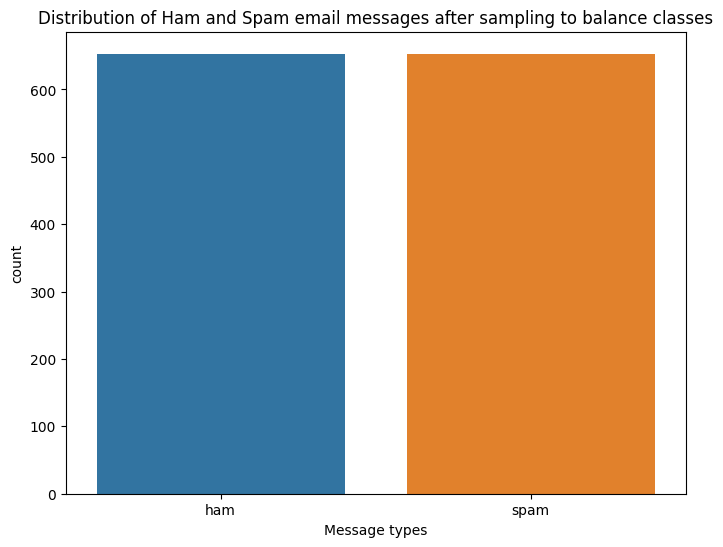

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data = balanced_df, x = 'label')
plt.title('Distribution of Ham and Spam email messages after sampling to balance classes')
plt.xlabel('Message types')
plt.show()

In [ ]:
print(df.label.value_counts())
print(balanced_df.label.value_counts())

ham     4498
spam     653
Name: label, dtype: int64
ham     653
spam    653
Name: label, dtype: int64


Now that our classes are balanced, we'll train an identical version of our model and compare metrics.

In [ ]:
balanced_X_train, balanced_X_rest, balanced_Y_train, balanced_Y_rest = train_test_split(balanced_df["clean_content"], balanced_df["target"], test_size = 0.4, stratify = balanced_df["target"], random_state = 42)
balanced_X_val, balanced_X_test, balanced_Y_val, balanced_Y_test = train_test_split(balanced_X_rest, balanced_Y_rest, test_size=0.5, stratify = balanced_Y_rest, random_state = 42)

In [ ]:
tokenizer2 = tf.keras.preprocessing.text.Tokenizer(num_words=1000, oov_token = "out_of_vocab")
tokenizer2.fit_on_texts(balanced_X_train)

balanced_X_train_encoded = tokenizer2.texts_to_sequences(balanced_X_train)
balanced_X_val_encoded = tokenizer2.texts_to_sequences(balanced_X_val)
balanced_X_test_encoded = tokenizer2.texts_to_sequences(balanced_X_test)

In [ ]:
balanced_train_padded = tf.keras.preprocessing.sequence.pad_sequences(balanced_X_train_encoded, padding="post")
balanced_val_padded = tf.keras.preprocessing.sequence.pad_sequences(balanced_X_val_encoded, padding="post")
balanced_test_padded = tf.keras.preprocessing.sequence.pad_sequences(balanced_X_test_encoded, padding="post")

In [ ]:
balanced_train = tf.data.Dataset.from_tensor_slices((balanced_train_padded, balanced_Y_train))
balanced_val = tf.data.Dataset.from_tensor_slices((balanced_val_padded, balanced_Y_val))
balanced_test = tf.data.Dataset.from_tensor_slices((balanced_test_padded, balanced_Y_test))

In [ ]:
balanced_train_batch = balanced_train.shuffle(len(balanced_X_train)).batch(64)
balanced_val_batch = balanced_val.shuffle(len(balanced_X_val)).batch(64)
balanced_test_batch = balanced_test.shuffle(len(balanced_X_test)).batch(64)

In [ ]:
embedding_dim = 8
vocab_size = tokenizer2.num_words + 1 # the number of words in the vocabulary : the input dim needs to be equal to the size of the vocabulary + 1 (because of the zero padding)

model2 = Sequential([
  Embedding(
      input_dim = vocab_size,
      output_dim = embedding_dim,
      name = "embedding"), # the embedding layer
  GlobalAveragePooling1D(), # this will pick the average for every word in the sentence along each dimension of the representation space.
  Dense(16, activation='relu'), # a dense layer
  Dense(1, activation="sigmoid") # the prediction layer
])

In [ ]:
model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 8)           8008      
                                                                 
 global_average_pooling1d_1  (None, 8)                 0         
 1 (GlobalAveragePooling1D)                                      
                                                                 
 dense_22 (Dense)            (None, 16)                144       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 8169 (31.91 KB)
Trainable params: 8169 (31.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model2.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), # from_logits = True to interpret y_pred as a tensor of logit values and not a probability
              metrics = ['accuracy'],
              optimizer = 'adam')

In [ ]:
history = model2.fit(balanced_train_batch,
                    epochs = 50,
                    callbacks = [lr, es],
                    validation_data = balanced_val_batch
                   )

Epoch 1/50
13/13 [==============================] - 1s 14ms/step - loss: 0.6925 - accuracy: 0.5006 - val_loss: 0.6897 - val_accuracy: 0.4981 - lr: 0.0010
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.6894 - accuracy: 0.7510 - val_loss: 0.6855 - val_accuracy: 0.7854 - lr: 0.0010
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.6862 - accuracy: 0.8352 - val_loss: 0.6806 - val_accuracy: 0.7969 - lr: 0.0010
Epoch 4/50
13/13 [==============================] - 0s 6ms/step - loss: 0.6822 - accuracy: 0.8608 - val_loss: 0.6748 - val_accuracy: 0.7969 - lr: 0.0010
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 0.6772 - accuracy: 0.8774 - val_loss: 0.6674 - val_accuracy: 0.8199 - lr: 0.0010
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 0.6709 - accuracy: 0.8787 - val_loss: 0.6585 - val_accuracy: 0.8161 - lr: 0.0010
Epoch 7/50
13/13 [==============================] - 0s 4ms/step - loss: 0.6629 - 

In [ ]:
fig = go.Figure(data=[
                      go.Scatter(
                          y = model2.history.history["loss"],
                          name="Training loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[0]
                          )),
                      go.Scatter(
                          y = model2.history.history["val_loss"],
                          name="Validation loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[1]
                          ))
])
fig.update_layout(
    title='Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='Binary Cross Entropy'
)
fig.show()

In [ ]:
fig = go.Figure(data=[
                      go.Scatter(
                          y=model2.history.history["accuracy"],
                          name="Training accuracy",
                          mode="lines",
                          marker=dict(
                              color=color_chart[0]
                          )),
                      go.Scatter(
                          y=model2.history.history["val_accuracy"],
                          name="Validation accuracy",
                          mode="lines",
                          marker=dict(
                              color=color_chart[1]
                          ))
])
fig.update_layout(
    title='Training and val accuracy across epochs',
    xaxis_title='epochs',
    yaxis_title='Accuracy'
)
fig.show()

In [ ]:
test_loss, test_accuracy = model2.evaluate(balanced_test_batch)
print('Test Loss :',test_loss)
print('Test Accuracy :',test_accuracy)

5/5 [==============================] - 0s 5ms/step - loss: 0.2128 - accuracy: 0.9046
Test Loss : 0.21279732882976532
Test Accuracy : 0.9045801758766174


9/9 [==============================] - 0s 2ms/step


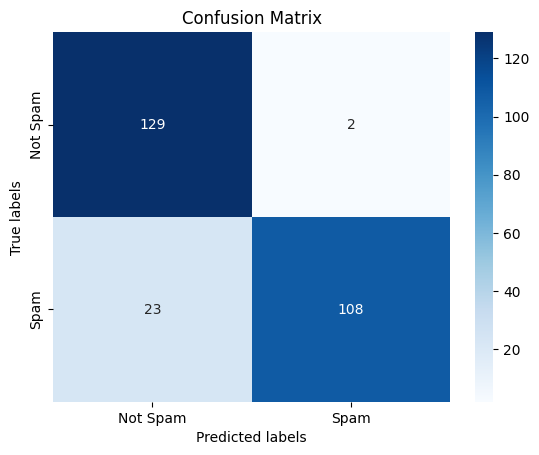

In [ ]:
balanced_test_pred = [1 if o>0.5 else 0 for o in model2.predict(balanced_test_padded)]
balanced_cf_matrix = confusion_matrix(balanced_Y_test, balanced_test_pred)

ax = plt.subplot()
sns.heatmap(balanced_cf_matrix, annot = True, ax = ax, cmap = 'Blues', fmt = '');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);

In [ ]:
print("Precision: {:.2f}%".format(100 * precision_score(balanced_Y_test, balanced_test_pred)))
print("Recall: {:.2f}%".format(100 * recall_score(balanced_Y_test, balanced_test_pred)))
print("F1 Score: {:.2f}%".format(100 * f1_score(balanced_Y_test, balanced_test_pred)))

Precision: 98.18%
Recall: 82.44%
F1 Score: 89.63%


Unfortunately, rebalancing classes has not proven to be efficient in improving our model's performance.

Our first model was a very simple neural network, perhaps using a more complex architecture will yield better results.

# 7. Recurrent neural network

Recurrent neurons are particularly interesting when it comes to NLP due to their ability to retain information throughout the forward pass process : a sentence is more than a collection of words, and its meaning depends on context and how each word is used in relation to the others. In particular, LSTMs (Long Short Term Memory Networks) are able to learn long-term dependencies.

Moreover, for some sentences, the context information is found at the end of the sentence. Without it, ambiguity might arise. Including two LSTM neurons instead of one, in what is called a bidirectional layer, will allow us to feed the input sequence to our ntwork both in order and in reverse. The 2 outputs will be merged and passed on to the next layer.

In [ ]:
embedding_dim = 16
vocab_size = tokenizer.num_words + 1 # the number of words in the vocabulary : the input dim needs to be equal to the size of the vocabulary + 1 (because of the zero padding)

model3 = Sequential([
  Embedding(
      input_dim = vocab_size,
      output_dim = embedding_dim,
      name = "embedding"), # the embedding layer
  Bidirectional(LSTM(32)),
  Dense(16, activation='relu'), # a dense layer
  Dense(1, activation="sigmoid") # the prediction layer
])

In [ ]:
model3.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          16016     
                                                                 
 bidirectional (Bidirection  (None, 64)                12544     
 al)                                                             
                                                                 
 dense_30 (Dense)            (None, 16)                1040      
                                                                 
 dense_31 (Dense)            (None, 1)                 17        
                                                                 
Total params: 29617 (115.69 KB)
Trainable params: 29617 (115.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model3.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), # from_logits = True to interpret y_pred as a tensor of logit values and not a probability
              metrics = ['accuracy'],
              optimizer = 'adam')

In [ ]:
history = model3.fit(train_batch,
                    epochs = 50,
                    callbacks = [lr, es],
                    validation_data = val_batch
                   )

Epoch 1/50
49/49 [==============================] - 12s 128ms/step - loss: 0.4970 - accuracy: 0.8602 - val_loss: 0.3453 - val_accuracy: 0.8738 - lr: 0.0010
Epoch 2/50
49/49 [==============================] - 3s 68ms/step - loss: 0.2445 - accuracy: 0.9006 - val_loss: 0.1441 - val_accuracy: 0.9515 - lr: 0.0010
Epoch 3/50
49/49 [==============================] - 3s 67ms/step - loss: 0.1087 - accuracy: 0.9686 - val_loss: 0.0815 - val_accuracy: 0.9709 - lr: 0.0010
Epoch 4/50
49/49 [==============================] - 5s 93ms/step - loss: 0.0632 - accuracy: 0.9822 - val_loss: 0.0615 - val_accuracy: 0.9786 - lr: 0.0010
Epoch 5/50
49/49 [==============================] - 5s 102ms/step - loss: 0.0458 - accuracy: 0.9854 - val_loss: 0.0611 - val_accuracy: 0.9806 - lr: 0.0010
Epoch 6/50
49/49 [==============================] - 3s 65ms/step - loss: 0.0336 - accuracy: 0.9900 - val_loss: 0.0770 - val_accuracy: 0.9738 - lr: 0.0010
Epoch 7/50
49/49 [==============================] - 3s 71ms/step - loss: 

In [ ]:
fig = go.Figure(data=[
                      go.Scatter(
                          y = model3.history.history["loss"],
                          name="Training loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[0]
                          )),
                      go.Scatter(
                          y = model3.history.history["val_loss"],
                          name="Validation loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[1]
                          ))
])
fig.update_layout(
    title='Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='Binary Cross Entropy'
)
fig.show()

In [ ]:
fig = go.Figure(data=[
                      go.Scatter(
                          y=model3.history.history["accuracy"],
                          name="Training accuracy",
                          mode="lines",
                          marker=dict(
                              color=color_chart[0]
                          )),
                      go.Scatter(
                          y=model3.history.history["val_accuracy"],
                          name="Validation accuracy",
                          mode="lines",
                          marker=dict(
                              color=color_chart[1]
                          ))
])
fig.update_layout(
    title='Training and val accuracy across epochs',
    xaxis_title='epochs',
    yaxis_title='Accuracy'
)
fig.show()

Interestingly, this model trains much faster and in a much smoother way than our original one. However, it has e tendancy to overfit rather quickly (around epoch 5). To alleviate this, we'll add a Dropout layer to our neural network architecture.

In [ ]:
model4 = Sequential([
  Embedding(
      input_dim = vocab_size,
      output_dim = embedding_dim,
      name = "embedding"), # the embedding layer
  Bidirectional(LSTM(32)),
  Dense(16, activation='relu'), # a dense layer
  Dropout(0.1),
  Dense(1, activation="sigmoid") # the prediction layer
])

model4.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          16016     
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                12544     
 onal)                                                           
                                                                 
 dense_34 (Dense)            (None, 16)                1040      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_35 (Dense)            (None, 1)                 17        
                                                                 
Total params: 29617 (115.69 KB)
Trainable params: 29617 (115.69 KB)
Non-trainable params: 0 (0.00 Byte)
_______________

In [ ]:
model4.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), # from_logits = True to interpret y_pred as a tensor of logit values and not a probability
              metrics = ['accuracy'],
              optimizer = 'adam')

In [ ]:
history = model4.fit(train_batch,
                    epochs = 20,
                    callbacks = [lr, es],
                    validation_data = val_batch
                   )

Epoch 1/50
49/49 [==============================] - 9s 179ms/step - loss: 0.2946 - accuracy: 0.8796 - val_loss: 0.1815 - val_accuracy: 0.9233 - lr: 0.0010
Epoch 2/50
49/49 [==============================] - 7s 144ms/step - loss: 0.1523 - accuracy: 0.9602 - val_loss: 0.1277 - val_accuracy: 0.9718 - lr: 0.0010
Epoch 3/50
49/49 [==============================] - 5s 102ms/step - loss: 0.0870 - accuracy: 0.9783 - val_loss: 0.0589 - val_accuracy: 0.9816 - lr: 0.0010
Epoch 4/50
49/49 [==============================] - 8s 153ms/step - loss: 0.0514 - accuracy: 0.9858 - val_loss: 0.0615 - val_accuracy: 0.9796 - lr: 0.0010
Epoch 5/50
49/49 [==============================] - 8s 161ms/step - loss: 0.0388 - accuracy: 0.9880 - val_loss: 0.0594 - val_accuracy: 0.9825 - lr: 0.0010
Epoch 6/50
49/49 [==============================] - 6s 130ms/step - loss: 0.0267 - accuracy: 0.9922 - val_loss: 0.0656 - val_accuracy: 0.9786 - lr: 0.0010
Epoch 7/50
49/49 [==============================] - 4s 86ms/step - los

In [ ]:
fig = go.Figure(data=[
                      go.Scatter(
                          y = model4.history.history["loss"],
                          name="Training loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[0]
                          )),
                      go.Scatter(
                          y = model4.history.history["val_loss"],
                          name="Validation loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[1]
                          ))
])
fig.update_layout(
    title='Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='Binary Cross Entropy'
)
fig.show()

In [ ]:
fig = go.Figure(data=[
                      go.Scatter(
                          y=model4.history.history["accuracy"],
                          name="Training accuracy",
                          mode="lines",
                          marker=dict(
                              color=color_chart[0]
                          )),
                      go.Scatter(
                          y=model3.history.history["val_accuracy"],
                          name="Validation accuracy",
                          mode="lines",
                          marker=dict(
                              color=color_chart[1]
                          ))
])
fig.update_layout(
    title='Training and val accuracy across epochs',
    xaxis_title='epochs',
    yaxis_title='Accuracy'
)
fig.show()

In [ ]:
test_loss, test_accuracy = model4.evaluate(test_batch)
print('Test Loss :',test_loss)
print('Test Accuracy :',test_accuracy)

17/17 [==============================] - 3s 28ms/step - loss: 0.0747 - accuracy: 0.9796
Test Loss : 0.07466516643762589
Test Accuracy : 0.9796314239501953


33/33 [==============================] - 1s 37ms/step


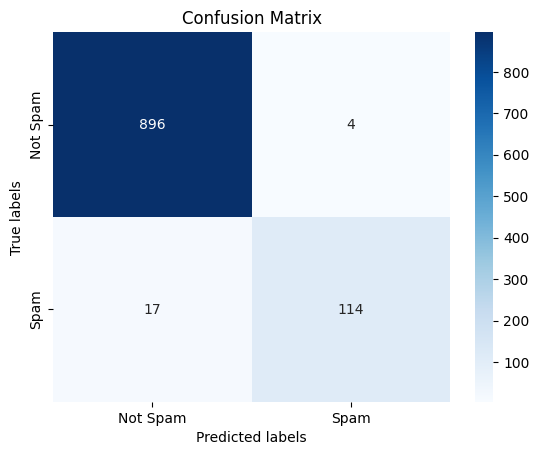

In [ ]:
test_pred4 = [1 if o>0.5 else 0 for o in model4.predict(test_padded)]
cf_matrix = confusion_matrix(Y_test, test_pred4)

ax = plt.subplot()
sns.heatmap(cf_matrix, annot = True, ax = ax, cmap = 'Blues',fmt = '');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);

In [ ]:
print("Precision: {:.2f}%".format(100 * precision_score(Y_test, test_pred4)))
print("Recall: {:.2f}%".format(100 * recall_score(Y_test, test_pred4)))
print("F1 Score: {:.2f}%".format(100 * f1_score(Y_test, test_pred4)))

Precision: 96.61%
Recall: 87.02%
F1 Score: 91.57%


These scores a very similar to those obtained with our first, simpler model.

We could argue that there is no particular need for LSTMs in this project since the purpose is not fine understanding of the messages, but rather sentiment analysis to classify them as ham or spam.
In addition, this more complex model tends to overfit very quickly.

However, we reach these scores much faster (after less than 10 epochs) and the evolutions of loss and accuracy are much smoother without plateau.

# 8. Pre-trained embedding model

At last, we'll try using a pre-trained word embedding in our model.

Embedding is the process of transforming text data into numerical vectors which a machine can understand.
Several LLMs provide embedding models that have been trained over a very large number of text data.

Word2Vec is one of them, and is particularly adapted to the problem at hand, since its embeddings are based on context and co-occurrence of words. The embedding vectors maintain semantic and syntactic relationships.

We will use the gensim library to extract word embeddings from the pretrained google news database.

The function "isInModel" serves to check whether the passed word is available in the google news dictionary.

The functions "getVector" is used to extract the word vector for a word passed as an argument, and other function

In [317]:
import gensim.downloader as api

word2vec = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [329]:
# Using tokenizer.word_index as a dictionary for our input data, we get corresponding word vectors from the Word2Vec embeddings, and save them in a matrix variable.
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 32))
for word, i in tokenizer.word_index.items():
  try:
    embedding_vector = word2vec[word]
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector
  except:
    pass

In [339]:
# The matrix is used to initialize weights in the Embedding layer of the model.
model5 = Sequential([
  Embedding(
      input_dim = vocab_size,
      output_dim = 32,
      weights=[embedding_matrix],
      trainable = True, # for fine tuning
      name = "embedding"), # the embedding layer
  GlobalAveragePooling1D(),
  Dense(16, activation='relu'), # a dense layer
  Dense(1, activation="sigmoid") # the prediction layer
])

model5.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          32032     
                                                                 
 global_average_pooling1d_1  (None, 32)                0         
 5 (GlobalAveragePooling1D)                                      
                                                                 
 dense_48 (Dense)            (None, 16)                528       
                                                                 
 dense_49 (Dense)            (None, 1)                 17        
                                                                 
Total params: 32577 (127.25 KB)
Trainable params: 32577 (127.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [340]:
model5.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), # from_logits = True to interpret y_pred as a tensor of logit values and not a probability
              metrics = ['accuracy'],
              optimizer = 'adam')

In [341]:
history = model5.fit(train_batch,
                    epochs = 50,
                    validation_data = val_batch
                   )

Epoch 1/50
49/49 [==============================] - 1s 8ms/step - loss: 0.6847 - accuracy: 0.8731 - val_loss: 0.6756 - val_accuracy: 0.8738
Epoch 2/50
49/49 [==============================] - 0s 4ms/step - loss: 0.6674 - accuracy: 0.8731 - val_loss: 0.6586 - val_accuracy: 0.8738
Epoch 3/50
49/49 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.8731 - val_loss: 0.6424 - val_accuracy: 0.8738
Epoch 4/50
49/49 [==============================] - 0s 5ms/step - loss: 0.6352 - accuracy: 0.8731 - val_loss: 0.6273 - val_accuracy: 0.8738
Epoch 5/50
49/49 [==============================] - 0s 4ms/step - loss: 0.6202 - accuracy: 0.8731 - val_loss: 0.6126 - val_accuracy: 0.8738
Epoch 6/50
49/49 [==============================] - 0s 5ms/step - loss: 0.6060 - accuracy: 0.8731 - val_loss: 0.5987 - val_accuracy: 0.8738
Epoch 7/50
49/49 [==============================] - 0s 4ms/step - loss: 0.5925 - accuracy: 0.8731 - val_loss: 0.5857 - val_accuracy: 0.8738
Epoch 8/50
49/49 [==

Unfortunately, we can see that this model's accuracy never improves throughout 50 epochs. We can deduce that although pretrained embedding models can be powerful, the training data and our input data are too different to use transfer learning in this case. Plus, our data is simple enough that the vanilla embedding is sufficient to work with.

# Conclusion

We have built a spam detection tool system using NLP and neural networks.

We converted text data into embedding vectors, created several models with different architectures and techniques, and fit the models with our data.

We applied a variety of text preprocessing techniques, text embedding techniques, and deep learning models.

We explored the possibilities for improving our model's performance, but in the end our first and simplest model remains the most efficient.

The concepts and techniques we have used can be applied to many other natural language processing tasks.


In [342]:
# Last but not least : let's create our requirements.txt file for this notebook :
!pip install pipreqs
!pipreqs .

  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=83ddb3f6b74f93bfc00ccb842887dbf7135bfa22a1cb5ed963a56fae1adbe055
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [350]:
!pip3 freeze > requirements.txt